Dominick Schulz, CPSC 322, Fall 2023, Notebook for HW-8

In [1]:
from data_table import *
from data_learn import *
from data_eval import *
from data_util import *

# Part 2: k-Means Clustering

The goal of this part is to experiment with your k-means implementation using the (simplified) UCI "iris" dataset (iris.txt in the starter code). 

## 1. Load the dataset

TODO: Load the iris.txt dataset as a DataTable. The columns of the table are: 
1. Sepal length (continuous values)
2. Sepal width (continuous values)
3. Petal length (continous values)
4. Petal width (continuous values)
5. Class (species name)

In [27]:
iris = DataTable(['slength', 'swidth', 'plength', 'pwidth', 'class'])
iris.load('iris.txt')

## 2. Create clusters

TODO: Using the iris data table and your HW8 k-means functions, find clusters for k = 2, k = 3, and k = 4 for the Sepal Width and Petal Width columns. For each of the three k values:  

(a). Call your select_k_random_centroids function to get k initial centroids. 

(b). Call your k_means algorithm using the initial centroids (and using Sepal Width and Petal Width). 

(c). Call the TSS function over the clusters returned. Print the corresponding cluster TSS values. 

(d). Repeat (a)-(c) and compare the results (i.e., with two different initial centroid instances). 

In [28]:
centroids = select_k_random_centroids(iris, 2)

In [29]:
clusters = k_means(iris, centroids, ['swidth', 'pwidth'])

In [30]:
tss(clusters, ['swidth', 'pwidth'])

[7.676999999999996, 28.824000000000016]

In [31]:
centroids_k3 = select_k_random_centroids(iris, 3)
clusters_k3 = k_means(iris, centroids_k3, ['swidth', 'pwidth'])
tss(clusters_k3, ['swidth', 'pwidth'])

[2.2650000000000015, 28.824000000000016, 1.0887500000000006]

In [32]:
centroids_k4 = select_k_random_centroids(iris, 4)
clusters_k4 = k_means(iris, centroids_k4, ['swidth', 'pwidth'])
tss(clusters_k4, ['swidth', 'pwidth'])

[2.186111111111111, 6.3983673469387705, 2.083809523809524, 5.933636363636363]

## 3. Plotting clusters

TODO: Again using the iris data and the Sepal and Petal Width columns, write code below to: 

(a). Generate clusters for k=2, k=3, k=4, k=5, k=6, and k=7. 

(b). For each k, create a scatterplot showing the clusters. Each data point in a cluster should have the same color. The seven colors should be: 'b' (blue), 'r' (red), 'g' (green), 'c' (cyan), 'm' (magenta), 'y' (yellow), and 'k' (khaki). 

Note that within a particular figure---started with plt.figure()---you can call plt.plot(...) multiple times to display different sets of data points (e.g., each with a different color).

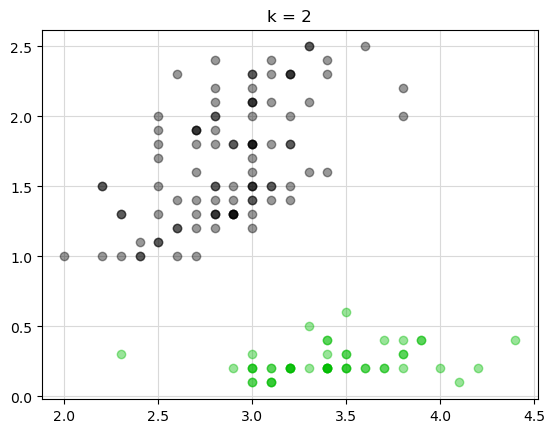

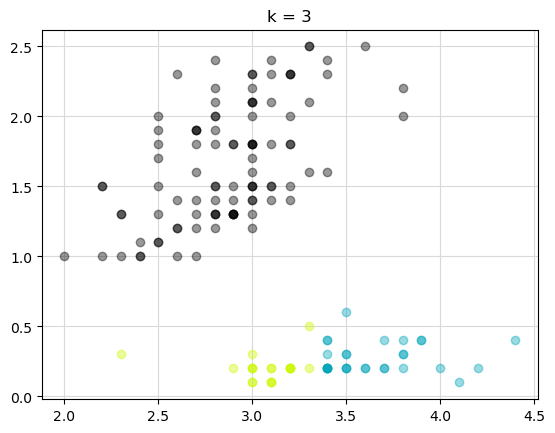

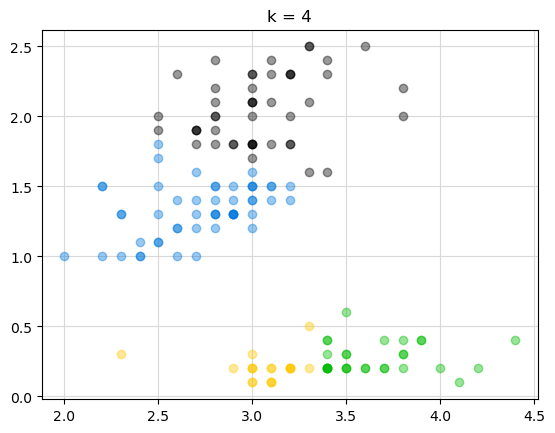

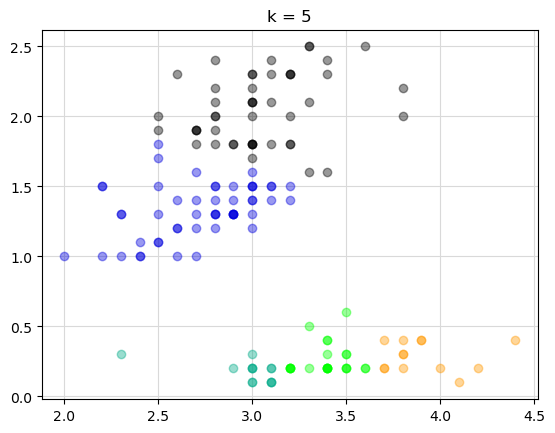

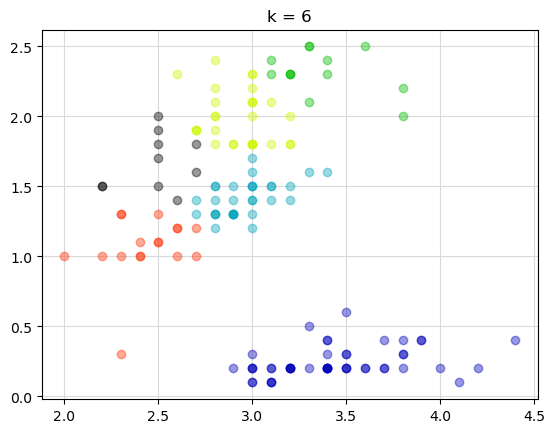

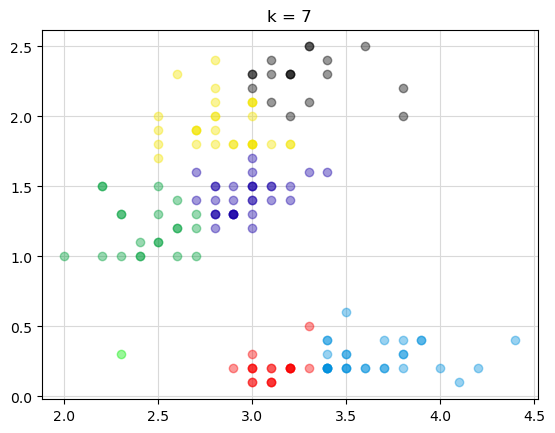

In [35]:
columns = ['swidth', 'pwidth']

# Loop over different values of k
for k in range(2, 8):

    centroids = select_k_random_centroids(iris, k)
    clusters = k_means(iris, centroids, columns)
    tss_values = tss(clusters, columns)
    
    plt.figure()
    plt.grid(color='0.85', zorder=0)
    
    for cluster_idx, cluster in enumerate(clusters):
        color = plt.cm.nipy_spectral(float(cluster_idx) / k)
        for row in cluster:
            plt.plot(row[columns[0]], row[columns[1]], marker='.', color=color, alpha=0.4, markersize=12, linestyle='', zorder=3)
    
    # k value as title
    title = f'k = {k}'
    plt.title(title)
    
    plt.show()
    plt.close()

# Issues, Challenges, and Observations

I found it very difficult (as noted by Professor Bowers) to get the random forest measures to improve upon a single decision tree. I also noticed some very slight differences when comparing my k=7 kmeans cluster to the example. I think this may have to do with a rounding difference as my plot is still very similar. 